In [189]:
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr

In [2]:
mearth = 5.97e27
msun = 1.9892e33
rearth = 6.371008e8
rsun = 6.9598e10
rfrac = rsun/rearth
mfrac = msun/mearth

In [3]:
def formatstring(myfloat):
    return '%.5f'%myfloat

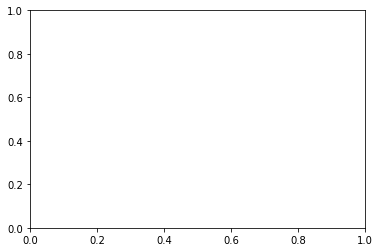

In [4]:
plt.figure()
ax = plt.gca()

In [5]:
mpList = list(np.linspace(7.0,8.0,11))
for i, m in enumerate(mpList):
    mpList[i] = formatstring(m)

In [7]:
fList = list(np.logspace(-4,np.log10(2*(10**-2)),10))
for i, f in enumerate(fList):
    fList[i] = formatstring(f)

In [10]:
entropyList = [7.28,7.28,7.29,7.29,7.3,7.3,7.3,7.31,7.31,7.32,7.32]
for i, ent in enumerate(entropyList):
    entropyList[i] = formatstring(ent)

In [120]:
def envelope_fraction(history):
    return history.envelope_mass/(history.star_mass*msun)

def calcX(history):
    return history.Hydrogen_Mass / history.envelope_mass

def calcY(history):
    return history.He4_Mass / history.envelope_mass

def calcZ(history):    
    return 1 - calcX(history) - calcY(history)

def deltaf(history):
    initf = history.envelope_mass[0] / (history.star_mass[0] * msun)
    finf = history.envelope_mass[-1] / (history.star_mass[-1] * msun)
    return finf - initf 

def deltam(history):
    initm = history.star_mass[0] * mfrac
    finm = history.star_mass[-1] * mfrac
    return finm - initm

/Users/bridgethaas/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


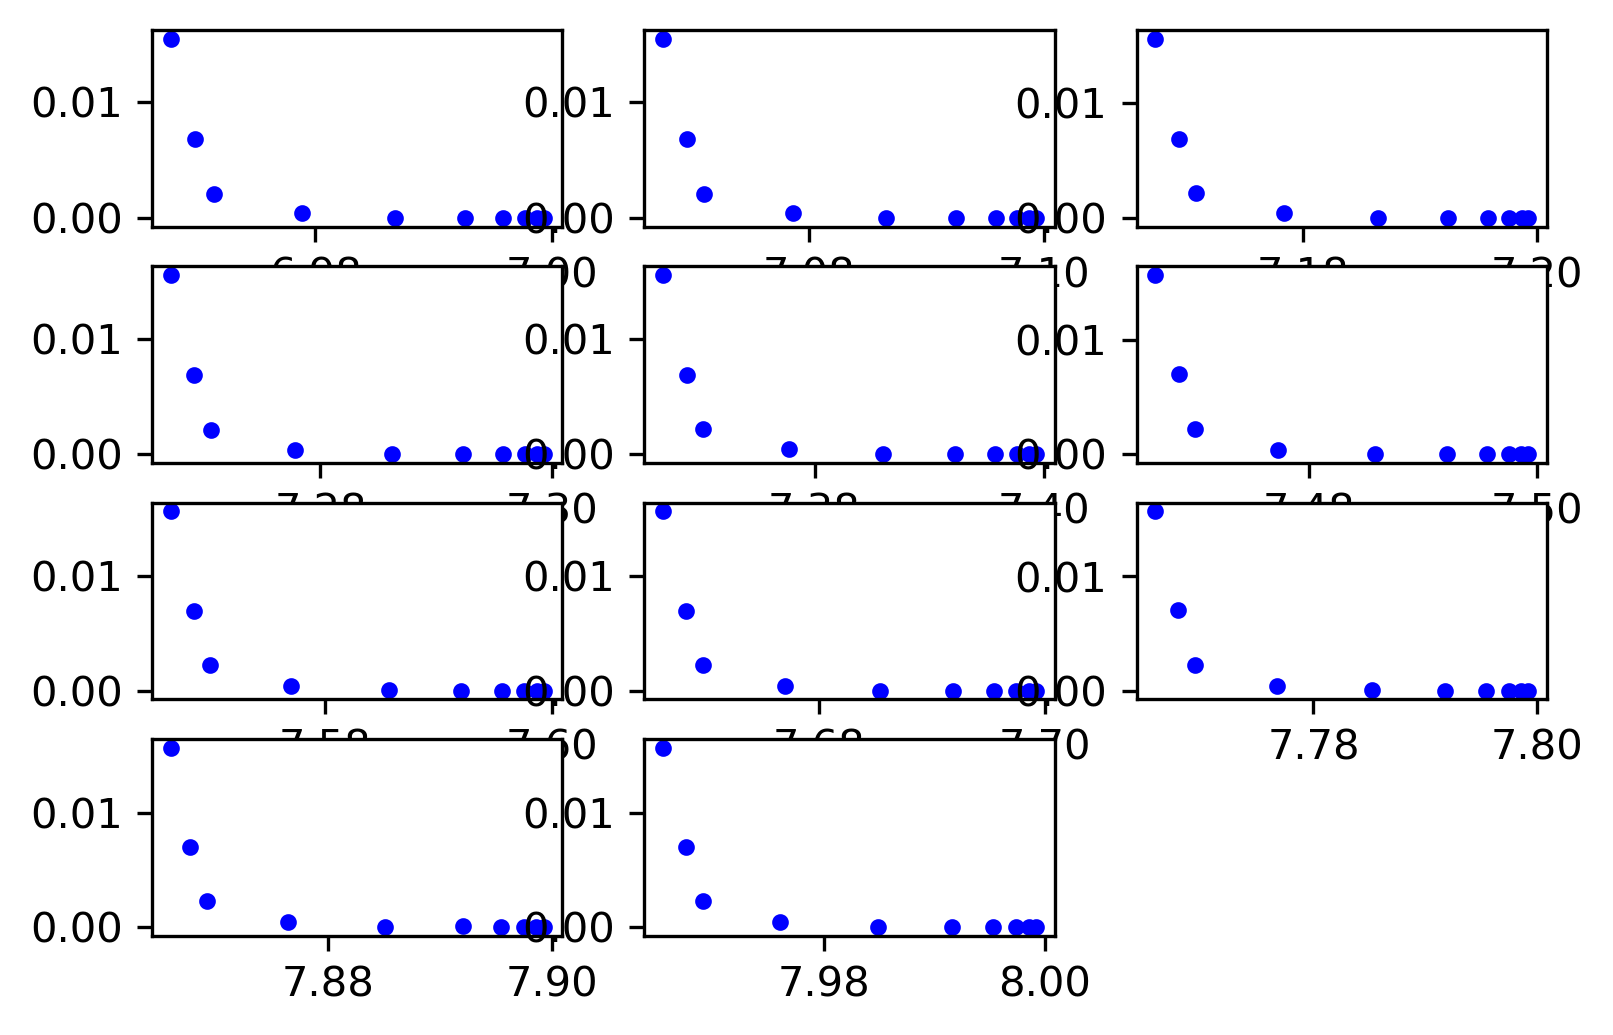

In [15]:
for i, m in enumerate(mpList):
    ent = entropyList[i]
    
    for j, f in enumerate(fList):
        h = mr.MesaData('data/biggrid/hist_evolve_%s_%s_0.24000_0.02000_0.03392_%s_0.10000.data'%(m,f    ,ent) ,file_type='log')

        plt.subplot(4, 3, i+1)
        plt.plot(h.star_mass[-1]*mfrac,h.envelope_mass[-1]/(h.star_mass[-1]*msun),marker='.',color='b')
        
plt.gcf().set_dpi(300)
#ax.set_xlabel('time, Gyr')
#ax.set_ylabel('envelope fraction')
#ax.set_yscale('log')

In [123]:
#N_planets x N_timesteps:
masses = [] 
radii = [] 
fs = []
#N-planets
deltams = []
deltafs = []
ages = []

for i, m in enumerate(mpList):
    ent = entropyList[i]
    
    for j, f in enumerate(fList):
        h = mr.MesaData('data/biggrid/hist_evolve_%s_%s_0.24000_0.02000_0.03392_%s_0.10000.data'%(m,f,ent),file_type='log')
        
        masses.append(h.star_mass*mfrac)
        radii.append(h.radius*rfrac)
        fs.append(envelope_fraction(h))
        
        deltams.append(deltam(h))
        deltafs.append(deltaf(h))
        ages.append(h.star_age[-1])

In [97]:
min(np.hstack(fs))

1.98531174327598e-18

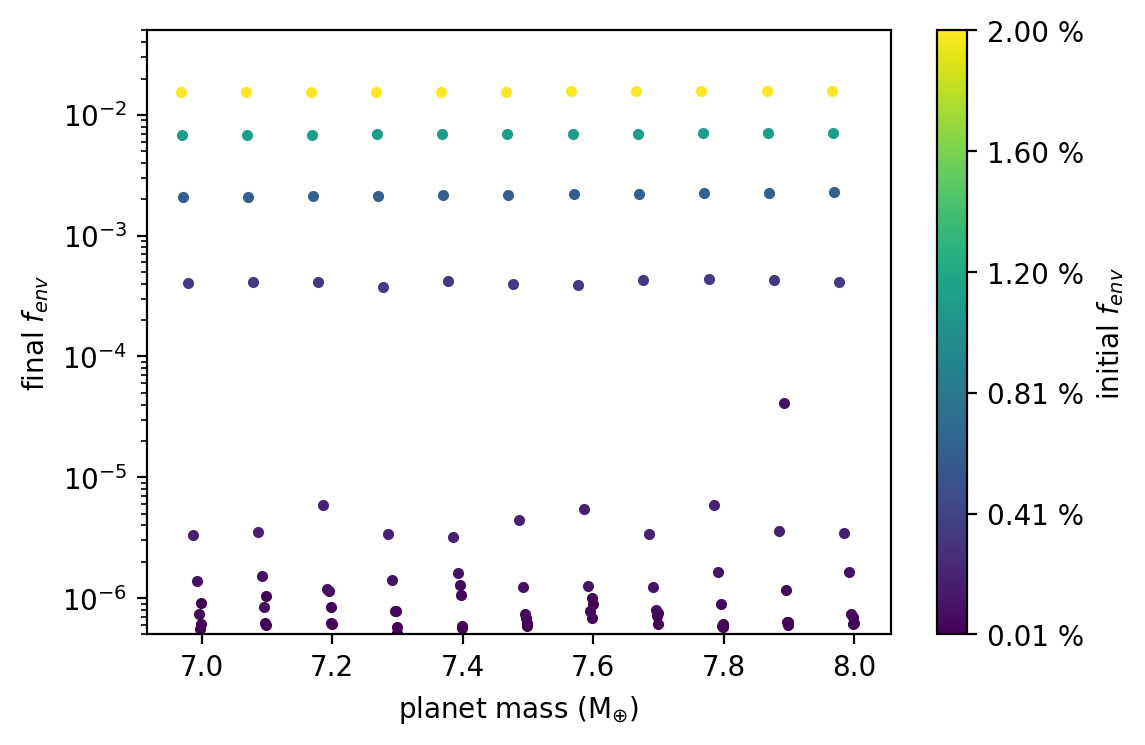

In [260]:
absmin = 1e-4 #np.min(np.hstack(fs))
absmax = np.max(np.hstack(fs))

for i in range(0,len(fs)):
    thiscolor = (fs[i][0] - absmin)/(absmax - absmin)
    thiscolor = np.max(thiscolor,0)
    plt.scatter(masses[i][-1],fs[i][-1],marker='.',color=cmap(thiscolor))
        
plt.gcf().set_dpi(200)
plt.gca().set_yscale('log')
plt.gca().set_ylim(5e-7,5e-2)
plt.gca().set_xlabel('planet mass (M$_{\oplus}$)')
plt.gca().set_ylabel('final $f_{env}$')

cbar = plt.colorbar()
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
labels = ticks * (absmax-absmin) + absmin
labels = ['%.2f %%'%(label * 100) for label in labels]
cbar.set_ticklabels(labels)
cbar.set_label('initial $f_{env}$')

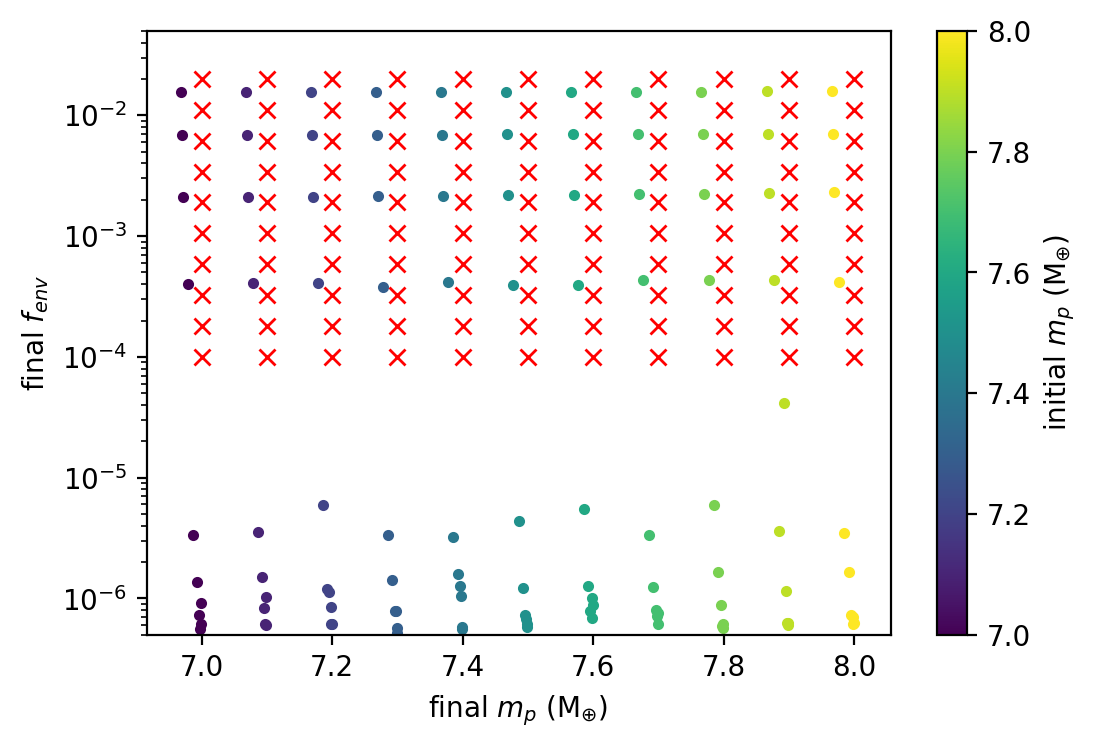

In [266]:
for i in range(0,len(masses)):
    thiscolor = (masses[i][0] - 7.0)/(1.0)
    thiscolor = np.max(thiscolor,0)
    plt.scatter(masses[i][-1],fs[i][-1],marker='.',color=cmap(thiscolor))
    plt.plot(masses[i][0],fs[i][0],marker='x',color='red')
        
plt.gcf().set_dpi(200)
plt.gca().set_yscale('log')
plt.gca().set_ylim(5e-7,5e-2)
plt.gca().set_xlabel('final $m_p$ (M$_{\oplus}$)')
plt.gca().set_ylabel('final $f_{env}$')

cbar = plt.colorbar()
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
cbar.set_ticklabels([7.0,7.2,7.4,7.6,7.8,8.0])
cbar.set_label('initial $m_p$ (M$_{\oplus}$)')

In [252]:
logabsmin = np.log10(absmin)
logabsmax = np.log10(absmax)

Text(0, 0.5, '$\\Delta f_{env}$')

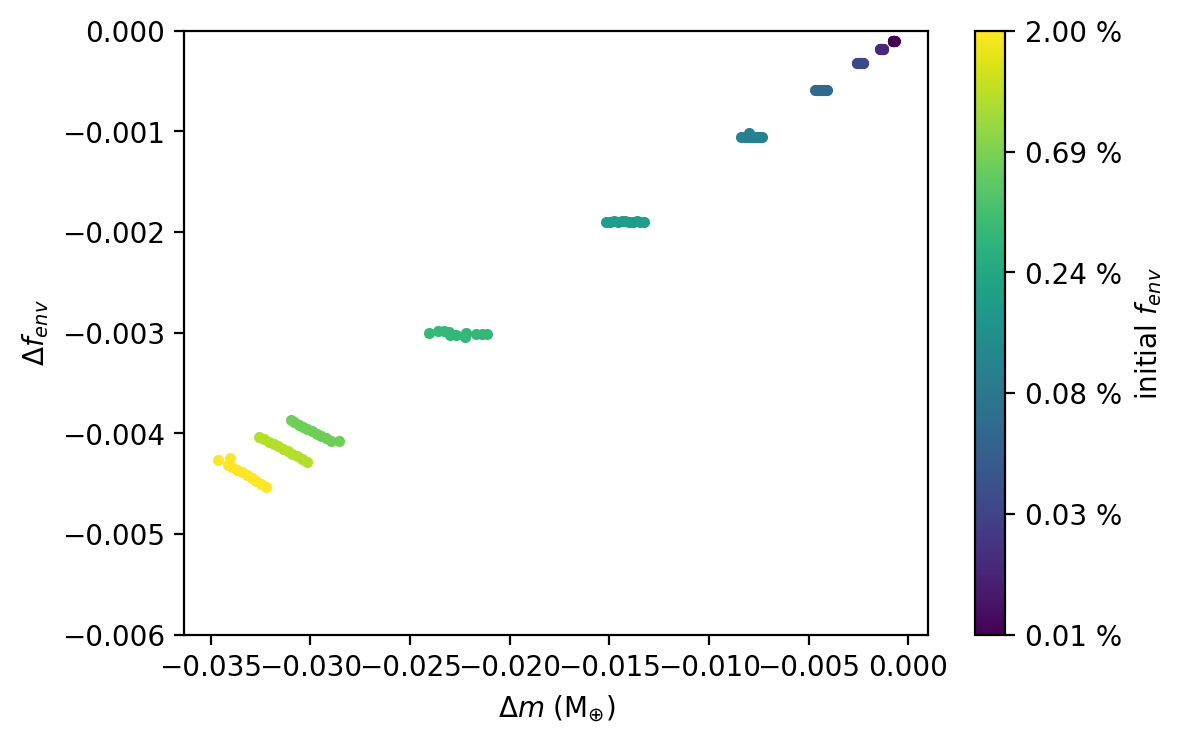

In [253]:
for i in range(0,len(fs)):
    thiscolor = (np.log10(fs[i][0]) - logabsmin)/(logabsmax - logabsmin)
    thiscolor = np.max(thiscolor,0)
    plt.plot(deltams[i],deltafs[i],'.',c=cmap(thiscolor))
    
plt.scatter([],[])
    
plt.gcf().set_dpi(200)   
plt.gca().set_ylim(-0.006,0)
cbar = plt.colorbar()
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
labels = ticks * (logabsmax-logabsmin) + logabsmin
labels = ['%.2f %%'%(10**label * 100) for label in labels]
cbar.set_ticklabels(labels)
cbar.set_label('initial $f_{env}$')

plt.gca().set_xlabel('$\Delta m$ (M$_{\oplus}$)')
plt.gca().set_ylabel('$\Delta f_{env}$')

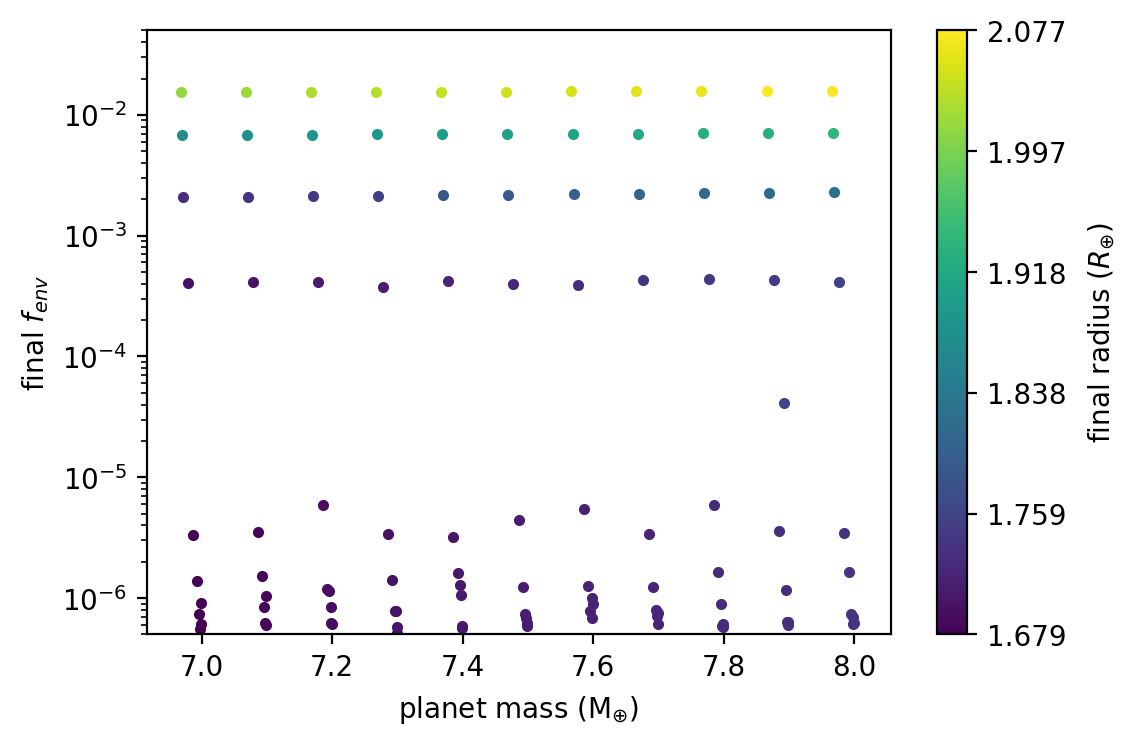

In [277]:
finradii = []
for i in range(0,len(radii)):
    finradii.append(radii[i][-1])
    
rabsmin = np.min(finradii)
rabsmax = np.max(finradii)    
    
for i in range(0,len(radii)):
    thiscolor = (finradii[i] - rabsmin)/(rabsmax - rabsmin)
    plt.scatter(masses[i][-1],fs[i][-1],marker='.',color=cmap(thiscolor))
        
plt.gcf().set_dpi(200)
plt.gca().set_yscale('log')
plt.gca().set_ylim(5e-7,5e-2)
plt.gca().set_xlabel('planet mass (M$_{\oplus}$)')
plt.gca().set_ylabel('final $f_{env}$')

cbar = plt.colorbar()
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
labels = ticks * (rabsmax-rabsmin) + rabsmin
labels = ['%.3f '%(label) for label in labels]
cbar.set_ticklabels(labels)
cbar.set_label('final radius ($R_{\oplus}$)')

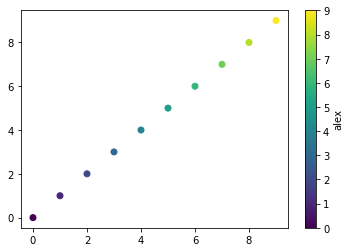

In [50]:
colors = ['red']*10
#colors[2] = cmap(0.8)
plt.scatter(range(10),range(10),c=range(10))
cbar = plt.colorbar()

In [171]:
cmap = plt.get_cmap('viridis')

In [51]:
dir(cbar)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_solids',
 '_boundaries',
 '_central_N',
 '_config_axes',
 '_edges',
 '_extend_lower',
 '_extend_upper',
 '_extended_N',
 '_find_range',
 '_get_extension_lengths',
 '_get_ticker_locator_formatter',
 '_inside',
 '_label',
 '_labelkw',
 '_locate',
 '_manual_tick_data_values',
 '_mesh',
 '_outline',
 '_patch_ax',
 '_process_values',
 '_proportional_y',
 '_reset_locator_formatter_scale',
 '_set_label',
 '_slice_dict',
 '_ticker',
 '_uniform_y',
 '_use_auto_colorbar_locator',
 '_values',
 '_y',
 'add_lines',
 'alpha',
 'ax',
 'boundaries',
 'cmap',
 'config_axis',
 'dividers',
 'draw_all',
 'drawedges',
 'extend',
 'exten